# <center>Laboratorium 12<br>Metody Numeryczne</center>    


Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań różniczkowych
zwyczajnych. Będziemy rozpatrywać równania różniczkowe postaci
$$\dot{x}(t) = f(x(t), t)$$
gdzie:

$x(t) \in \mathbb{R}^n$,

$t \ge 0$ 


z warunkiem początkowym $x(0) = x0$

Jest to tak zwany problem początkowy (problem Cauchy’ego) dla równań różniczkowych zwyczajnych.

In [3]:
import main
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

**Zadanie 1.**  
Zaimplementuj metodę *solve_euler* z main.py 


***Zadanie 2.*** 

Rozwiąż równanie 
$
\dot{x}(t)=\frac{x+t}{x-t}
$, 

$x(0)=1$ (równanie to posiada rozwiązanie dokładne: 
$x(t)=t+\sqrt{1+2t^2}$). 

Narysuj wykres podanego rozwiązania dokładnego oraz uzyskanych rozwiązań numerycznych.


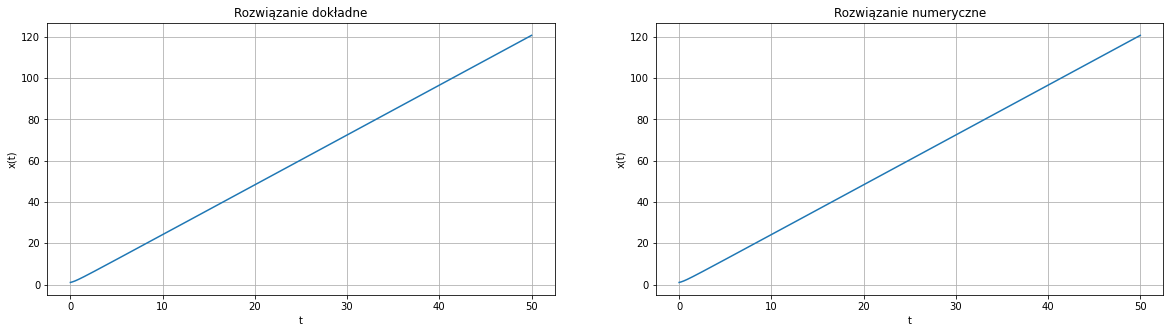

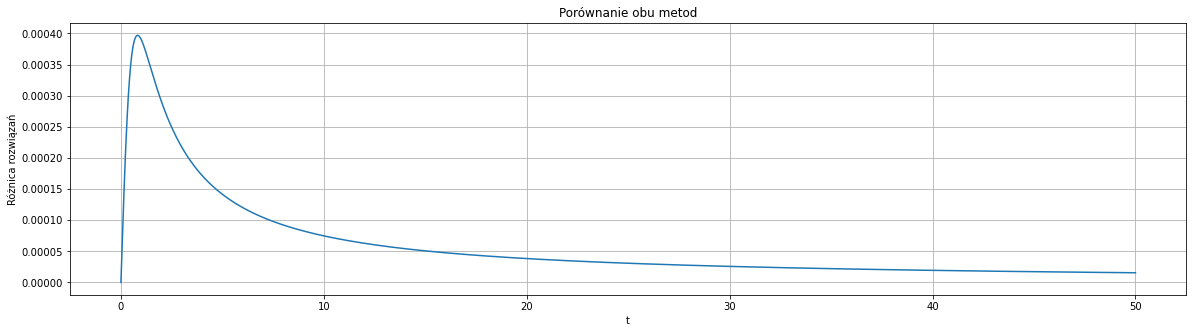

In [4]:
t = np.arange(0, 50, 0.001)
f_dokl = lambda t: t + np.sqrt(1 + 2 * (t**2))                              
fun = lambda t, x: (x+t) / (x-t)

x0 = [1]
euler = main.solve_euler(fun, t, x0)

fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Rozwiązanie dokładne")
ax1.plot(t, f_dokl(t))
ax1.set_ylabel("x(t)")
ax1.set_xlabel("t")
ax1.grid()

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Rozwiązanie numeryczne")
ax2.plot(t, euler[0])
ax2.set_ylabel("x(t)")
ax2.set_xlabel("t")
ax2.grid()
plt.show()

fig2 = plt.figure(figsize=(20,5))
plt.plot(t, np.abs(f_dokl(t) - euler[0]))
plt.title("Porównanie obu metod")
plt.grid()
plt.ylabel("Różnica rozwiązań")
plt.xlabel("t")
plt.show()

***Zadanie 3.*** 

Rozwiąż układ równań różniczkowych: 
$$
\begin{array}{l}
\dot{x_1}(t)={x_3}(t)\\
\dot{x_2}(t)={x_4}(t)\\
\dot{x_3}(t)=-\frac{x_1(t)}{{(x_1(t)^2+x_2(t)^2)}^{\frac{3}{2}}}\\
\dot{x_4}(t)=-\frac{x_2(t)}{{(x_1(t)^2+x_2(t)^2)}^{\frac{3}{2}}}
\end{array}
$$
      
z warunkiem początkowym $x(0)=[1,0,0,1]^T$.
    
Dla takiego warunku początkowego układ ten ma rozwiązanie szczególne 
$$
x(t)=\left[\begin{matrix}
cos(t)\\
sin(t)\\
-sin(t)\\
cos(t)
\end{matrix}\right].
$$  

Narysuj wykres podanego rozwiązania szczegółowego oraz uzyskanych rozwiązań numerycznych.

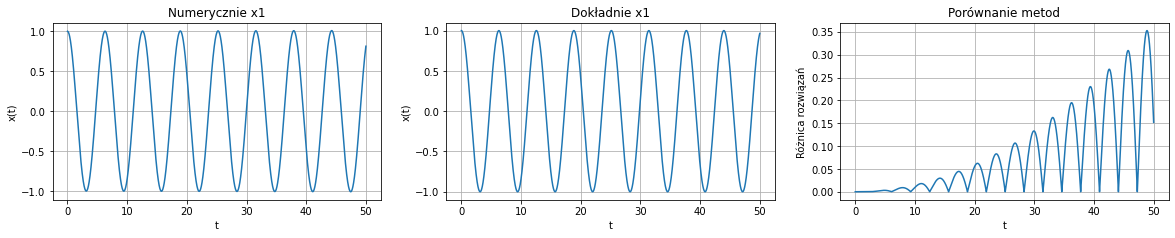

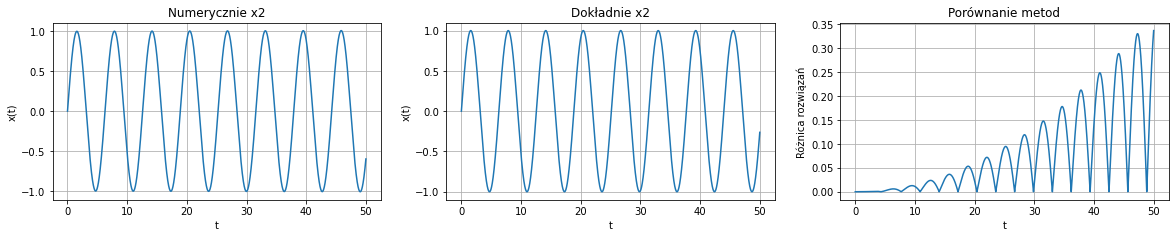

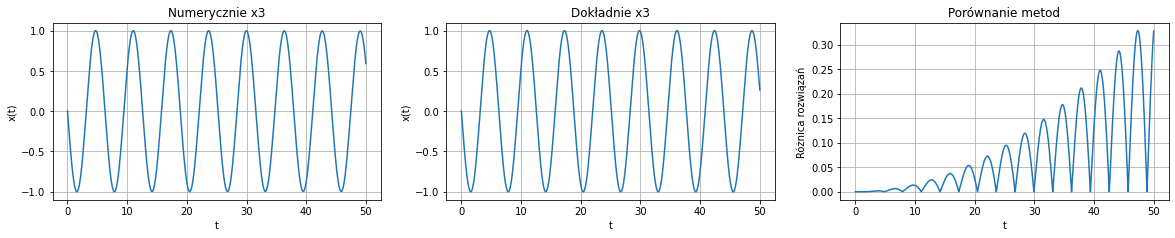

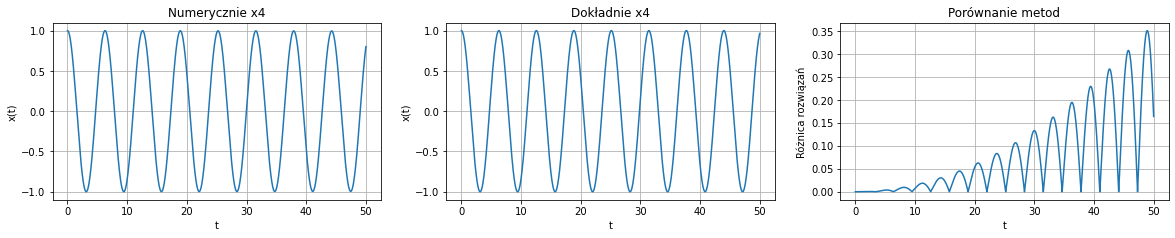

In [5]:
def fun(t, x):
    x1 = x[2]
    x2 = x[3]
    x3 = -x[0] / ((x[0]**2 + x[1]**2)**(3/2))
    x4 = -x[1] / ((x[0]**2 + x[1]**2)**(3/2))    
    return x1, x2, x3, x4

def f_dokl(t):
    return np.cos(t), np.sin(t), -np.sin(t), np.cos(t)

x0 = [1, 0, 0, 1]
t = np.arange(0, 50, 0.0001)

val_num = main.solve_euler(fun, t, x0)
val_dokl = f_dokl(t)


for i in [0, 1, 2, 3]:
    fig = plt.figure(figsize=(20,15))
    ax1 = fig.add_subplot(4,3,3*i+1)   
    ax1.set_title('Numerycznie x' + str(i+1))
    ax1.plot(t, val_num[i])
    ax1.set_ylabel('x(t)')
    ax1.set_xlabel('t')
    ax1.grid()
    
    ax2 = fig.add_subplot(4,3,3*i+2)   
    ax2.set_title("Dokładnie x" + str(i+1))
    ax2.plot(t, val_dokl[i])
    ax2.set_ylabel('x(t)')
    ax2.set_xlabel('t')
    ax2.grid()
    
    ax3 = fig.add_subplot(4,3,3*i+3)   
    ax3.set_title("Porównanie metod")
    ax3.plot(t, np.abs(val_num[i] - val_dokl[i]))
    ax3.set_ylabel('Różnica rozwiązań')
    ax3.set_xlabel('t')
    ax3.grid()
    
    plt.show()

***Zadanie 4.*** 

Rozwiąż układ równań $\dot{x}(t)=\mathbf{A}x(t)$, gdzie macierz 
$
\mathbf{A}$ dana jest wzorem:  
$$
\mathbf{A}=\left[\begin{matrix}
-667 & 333 \\
 666 & -334
\end{matrix}\right]
$$

z warynkiem początkowym $x(0)=[0, 3]^T$

Narysuj wykres uzyskanych rozwiązań numerycznych. Jakie jest rozwiązanie dokładne tego równania?

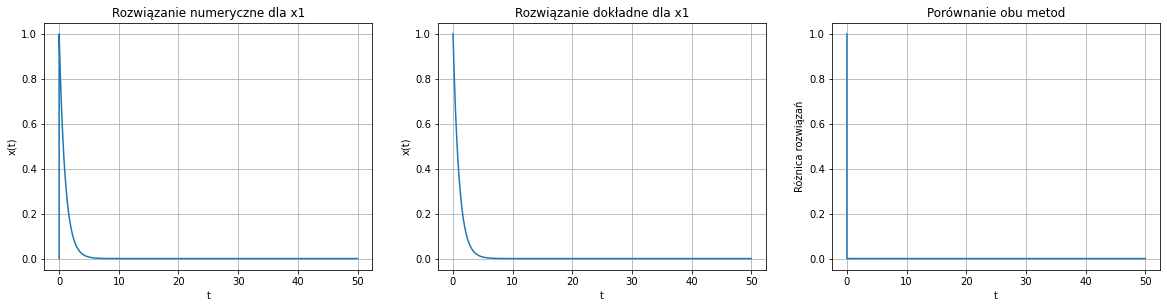

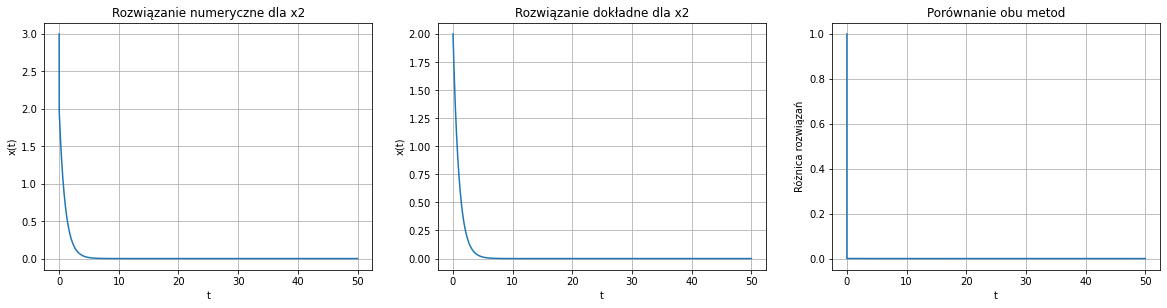

In [6]:
A = np.array([[-667, 333], [666, -334]])
fun = lambda t, x: A @ x
f_dokl = lambda t: [np.exp(-t), 2*np.exp(-t)]

x0 = [0, 3]
t = np.arange(0, 50, 0.001)
euler = main.solve_euler(fun, t, x0)
val_dokl = f_dokl(t)

for i in [0, 1]:
    fig = plt.figure(figsize=(20,10))
    ax1 = fig.add_subplot(2,3,3*i+1)   
    ax1.set_title("Rozwiązanie numeryczne dla x" + str(i+1))
    ax1.plot(t, euler[i])
    ax1.set_ylabel('x(t)')
    ax1.set_xlabel('t')
    ax1.grid()

    ax2 = fig.add_subplot(2,3,3*i+2)    
    ax2.set_title("Rozwiązanie dokładne dla x" + str(i+1))
    ax2.plot(t, val_dokl[i])
    ax2.set_ylabel('x(t)')
    ax2.set_xlabel('t')
    ax2.grid()

    ax3 = fig.add_subplot(2,3,3*i+3)    
    ax3.set_title("Porównanie obu metod")
    ax3.plot(t, np.abs(val_dokl[i] - euler[i]))
    ax3.set_ylabel("Różnica rozwiązań")
    ax3.set_xlabel("t")
    ax3.grid()

    plt.show()

***Zadanie 4.*** 

Orbita Arenstorfa. Jest to przykład z astronomii opisujący zredukowany problem trzech ciał. Rozważa się dwa ciała o masach $\mu$ i $\mu'=1-\mu$, poruszające się w ruchu kołowym na jednej płaszczyźnie oraz ciało o pomijalnej masie poruszające się między nimi w tej samej płaszczyźnie. Dany jest układ równań różniczkowych:
$$
\begin{array}{l}
\dot{x_1}(t)={x_2}(t)\\
\dot{x_2}(t)={x_1}(t)+2x_4(t)-\mu'\frac{x_1+\mu}{D_1}-\mu\frac{x_1-\mu'}{D_2}\\
\dot{x_3}(t)=x_4(t)\\
\dot{x_4}(t)=x_3(t)-2x_2(t)-\mu'\frac{x_3(t)}{D_1}
-\mu\frac{x_3(t)}{D_2}\end{array}.
$$

gdzie
$$
\begin{array}{l}
D_1=((x_1(t)+\mu)^2+{x_3}^2(t))^\frac{3}{2}\\
D_2=((x_1(t)-\mu')^2+{x_3}^2(t))^\frac{3}{2}\\
\mu=0.012277471\end{array}.
$$

Zmienne $x_1$ i $x_3$ odpowiadają za współrzędne na płaszczyźnie trzeciego ciała zaś $x_2$ i $x_4$
są odpowiednio prędkościami. Warto zwrócić uwagę, że zarówno czas jak i masa zostały
w równaniach przeskalowane, i nie mają bezpośredniej interpretacji fizycznej, należy je
traktować jako zmienne bezwymiarowe. Dla pewnych warunków początkowych i czasu
symulacji
$$
\begin{array}{l}
x_1(0) = 0.994\\
x_2(0) = 0\\
x_3(0) = 0\\
x_4(0) = − 2.00158510637908252240537862224\\
T = 17.0652165601579625588917206249.\end{array}
$$
dokładne rozwiązanie tych równań jest okresowe ($x(0)=x(T)$).

Narysuj wykres uzyskanych rozwiązań numerycznych.

In [7]:
def fun(t, x):
    u = 0.012277471
    D1 = ((x[0]+u)**2 + (x[2])**2)**(3/2)
    D2 = ((x[0]-(1-u))**2 + (x[2])**2)**(3/2)
    
    x1 = x[1]
    x2 = x[0] + 2*x[3] - (1-u)*((x[0]+u)/D1) - u*((x[0]-(1-u))/D2)
    x3 = x[3]
    x4 = x[2] - 2*x[1] - (1-u)*(x[2]/D1) - u*(x[2]/D2)
    
    return x1, x2, x3, x4

x0 = [0.994, 0, 0, -2.00158510637908252240537862224]
t = np.arange(0, 17.0652165601579625588917206249, 0.000001)
euler = main.solve_euler(fun, t, x0)

Tworzę nowe miejsce do pisania kodu, ponieważ powyższy kod wykonywał się bardzo długo, a chcąc poprawić błędy na wykresach, w ten sposób zaoszczędzam dużo czasu. Na poniższych wykresach pokażę współrzędne ciał, oraz ich prędkości.

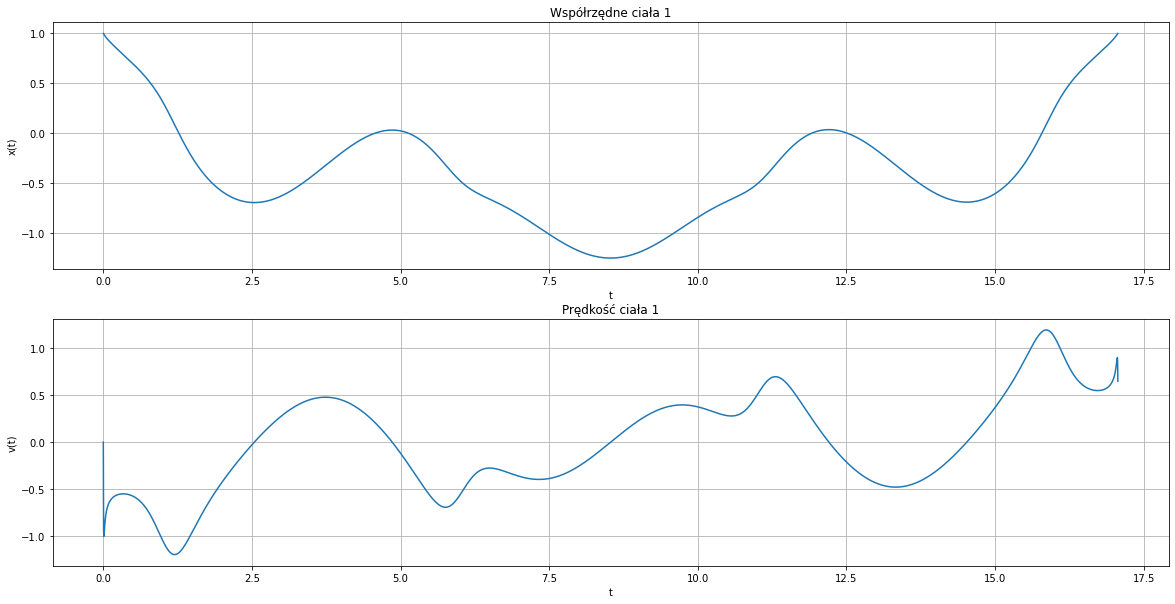

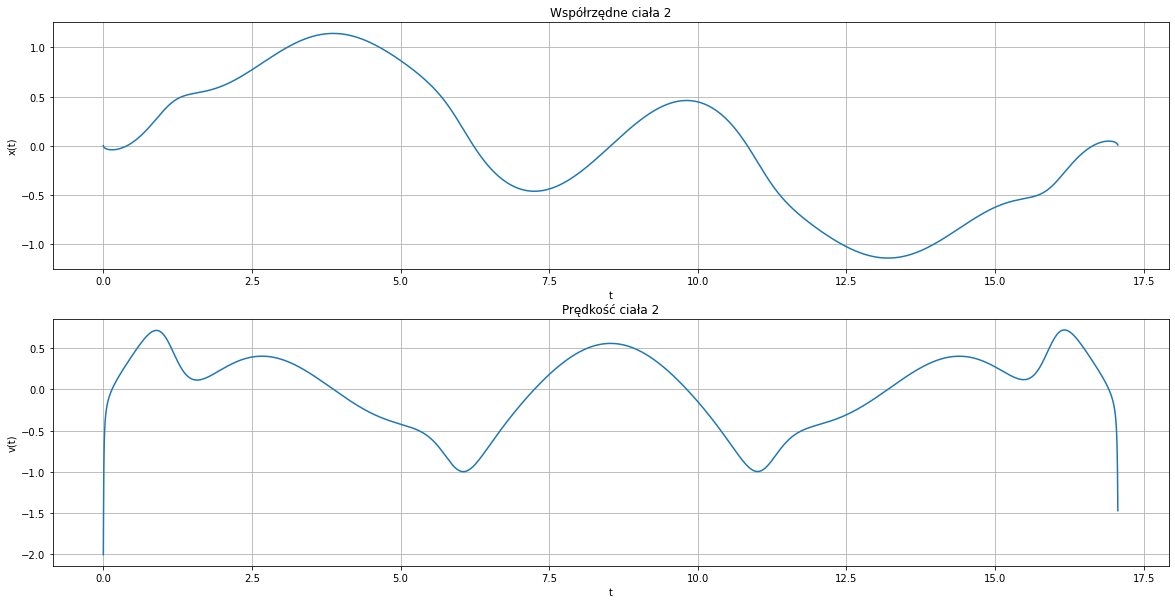

In [8]:
for i in [0, 1]:
    fig = plt.figure(figsize=(20,10))
    ax1 = fig.add_subplot(2,1,1)
    ax1.set_title('Współrzędne ciała ' + str(i+1))
    ax1.plot(t, euler[2*i])
    ax1.set_ylabel('x(t)')
    ax1.set_xlabel('t')
    ax1.grid()
    
    ax2 = fig.add_subplot(2,1,2)
    ax2.set_title('Prędkość ciała ' + str(i+1))
    ax2.plot(t, euler[2*i+1])
    ax2.set_ylabel('v(t)')
    ax2.set_xlabel('t')
    ax2.grid()
    plt.show()

Następnie tworzę wykres dla Orbity Arenstorfa.

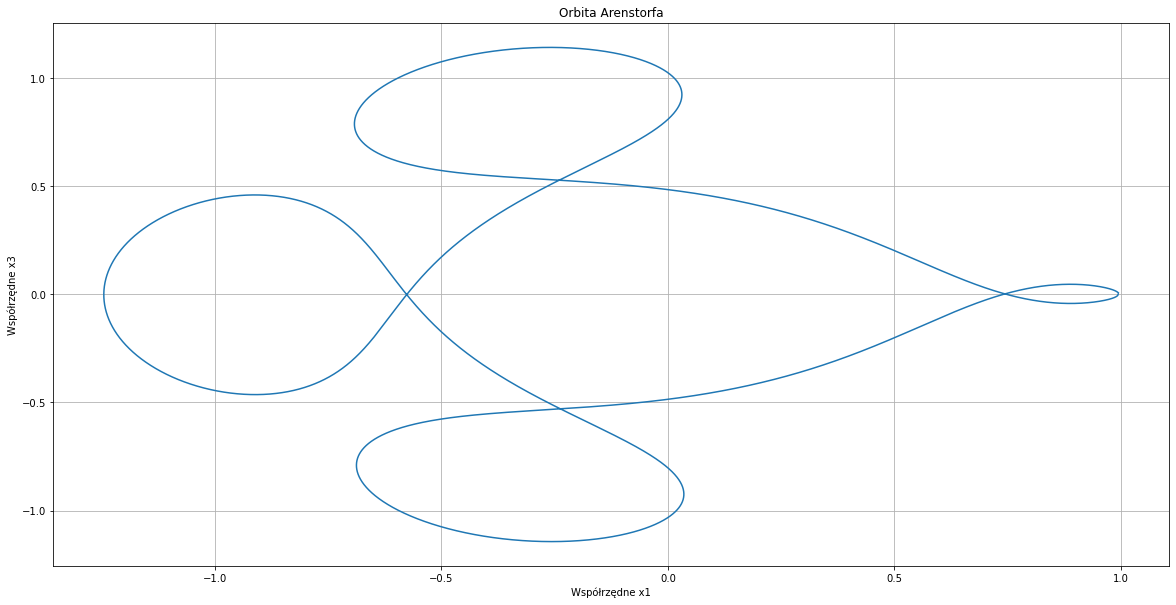

In [9]:
fig = plt.figure(figsize=(20,10))
plt.plot(euler[0], euler[2])
plt.title("Orbita Arenstorfa")
plt.xlabel('Współrzędne x1')
plt.ylabel('Współrzędne x3')
plt.grid()
plt.show()

**Bibliografia**

1. J. C. Butcher. Numerical Methods for Ordinary Differential Equations. John Wiley and Sons, Ltd., 2003.
2. Z. Fortuna, B. Macukow, and J. Wąsowski. Metody numeryczne. WNT Warszawa, 1982.
3. E. Hairer, S.P. Nørsett, and G. Wanner. Solving Ordinary Differential Equations: I Nonstiff problems. Springer, 2 edition, 2000.
4. W. Mitkowski. Równania macierzowe i ich zastosowania. Wydawnictwa AGH, Kraków,2 edition, 2007.
5. A. Ralston. Wstęp do analizy numerycznej. PWN, Warszawa, 1965.
6. L. F. Shampine, I. Gladwell, and S. Thompson. Solving ODEs with MATLAB. Cambridge University Press, 2003.
7. Stoer, J., Burlirsch, R., 1980: Wstêp do metod numerycznych, tom 2. PWN Warszawa.
